# TP2 - Market Basket Analysis 
INF8111 - Fouille de donn√©es, Summer 2020
### Membres de l'√©quipe
    - Guillaume Thibault 1948612
    - Marie-Eve Patron 1890562
    - Julien Witty     1949837


## Date et directives de remise
Vous remettrez ce fichier nomm√© dans la bo√Æte de remise sur moodle. 


## Market Basket Analysis

Le *Market Basket Analysis* (MBA) est une technique d'analyse de la fouille de donn√©es qui permet de d√©couvrir les associations entre les produits ou leur regroupement. En explorant des motifs int√©ressants √† partir d'une vaste collection de donn√©es, le MBA vise √† comprendre / r√©v√©ler les comportements d'achat des clients en se basant sur la th√©orie selon laquelle si vous avez achet√© un certain ensemble de produits, vous √™tes plus (ou moins) susceptible d'acheter un autre groupe de produits. En d'autres termes, le MBA permet aux d√©taillants d'identifier la relation entre les articles que les clients ach√®tent, r√©v√©lant des tendances d'articles souvent achet√©s ensemble.

Une approche largement utilis√©e pour explorer ces motifs consiste √† construire *** des r√®gles d'association *** telles que
- **si** achet√© *ITEM_1* **alors** ach√®tera *ITEM_2* avec **confiance** *X*.

Ces associations n'ont pas √† √™tre des r√®gles individuelles. Ils peuvent impliquer de nombreux √©l√©ments. Par exemple, une personne dans un supermarch√© peut ajouter des ≈ìufs dans son panier, puis le MBA peut sugg√©rer qu'elle ach√®tera √©galement du pain et/ou de la farine:

+ **si**  achet√© *OEUFS* **alors** ach√®tera [*PAIN* avec confiance *0,2*; *FARINE* avec confiance 0,05].

Cependant, si la personne d√©cide maintenant d'ajouter de la farine √† son panier, la nouvelle r√®gle d'association pourrait √™tre comme ci-dessous, sugg√©rant des ingr√©dients pour faire un g√¢teau.

+ **si** achet√© [*OEUFS, FARINE*] **alors** ach√®tera [*SUCRE* avec confiance 0,45; LEVURE avec confiance 0,12; *PAIN* avec confiance *0,03*].

Il existe de nombreux sc√©narios r√©els o√π le MBA joue un r√¥le central dans l'analyse des donn√©es, comme les transactions de supermarch√©, les commandes en ligne ou l'historique des cartes de cr√©dit. Les sp√©cialistes du marketing peuvent utiliser ces r√®gles d'association pour organiser les produits corr√©l√©s plus pr√®s les uns des autres sur les √©tag√®res des magasins ou faire des suggestions en ligne afin que les clients ach√®tent plus d'articles. Un MBA peut g√©n√©ralement aider les d√©taillants √† r√©pondre aux questions les suivantes:

- Quels articles sont souvent achet√©s ensemble ?
- √âtant donn√© un panier, quels articles sugg√©rer ?
- Comment placer les articles ensemble sur les √©tag√®res ?

### Objectif

Votre objectif dans ce TP est de d√©velopper un algorithme MBA pour r√©v√©ler les motifs en cr√©ant des r√®gles d'association dans un ensemble de donn√©es volumineux avec plus de trois millions de transactions de supermarch√©. Cependant, la collecte de r√®gles d'association dans les grands ensembles de donn√©es est un probl√®me tr√®s intensif en calcul, ce qui rend presque impossible leur ex√©cution sans syst√®me distribu√©. Par cons√©quent, pour ex√©cuter votre algorithme, vous aurez acc√®s √† un cluster de *cloud computing* distribu√© avec des centaines de c≈ìurs.

√Ä cette fin, un algorithme **MapReduce** sera impl√©ment√© avec le framework [Apache Spark](http://spark.apache.org), un syst√®me informatique distribu√© rapide. En r√©sum√©, Spark est un framework open source con√ßu avec une m√©thodologie *scale-out* qui en fait un outil tr√®s puissant pour les programmeurs ou les d√©veloppeurs d'applications pour effectuer un volume massif de calculs et de traitement de donn√©es dans des environnements distribu√©s. Spark fournit des API de haut niveau qui facilitent la cr√©ation d'applications parall√®les sans avoir √† se soucier de la fa√ßon dont votre code et vos donn√©es sont parall√©lis√©s / distribu√©s par le cluster informatique. Spark fait tout pour vous.

La mise en ≈ìuvre suivra l'algorithme d'analyse du panier de march√© pr√©sent√© par Jongwook Woo et Yuhang Xu (2012). L'image **workflow.pdf** illustre le flux de travail de l'algorithme et doit √™tre utilis√©e pour consultation tout au long de ce TP. Les cases bleues sont celles o√π vous devez impl√©menter une m√©thode pour effectuer une fonction de mappage ou de r√©duction, et les cases grises repr√©sentent leur sortie attendue. **Toutes ces op√©rations sont expliqu√©es en d√©tail dans les sections suivantes.**

## 1. Configuration de Spark

Spark fonctionne sur les syst√®mes Windows et UNIX (par exemple, Linux, Mac OS). Il est facile d'ex√©cuter Spark localement sur une seule machine - tout ce dont vous avez besoin est d'avoir Java install√© sur votre syst√®me PATH, ou la variable d'environnement JAVA_HOME pointant vers une installation Java. Il est obligatoire que le **JDK v8/11** soit install√© sur votre syst√®me, car Spark ne prend actuellement en charge que cette version. Si ce n'est pas le cas, acc√©dez √† [la page Web de Java](https://www.oracle.com/java/technologies/javase-downloads.html) pour t√©l√©charger et installer une machine virtuelle Java. N'oubliez pas de d√©finir la variable d'environnement JAVA_HOME pour utiliser JDK v8/11 si votre installation ne le fait pas automatiquement.

L'interface entre Python et Spark se fait via **PySpark**, qui peut √™tre install√© en ex√©cutant `pip install pyspark` ou configur√© en suivant la s√©quence ci-dessous:

1. D'abord, allez sur http://spark.apache.org/downloads
2. S√©lectionnez la derni√®re version de Spark et le package pr√©-construit pour Apache Hadoop 2.7
3. Cliquez pour t√©l√©charger **spark-3.1.1-bin-hadoop2.7.tgz** et d√©compressez-le dans le dossier de votre choix.
4. Ensuite, exportez les variables suivantes pour lier PYSPARK (l'interface python de Spark) √† votre distribution python dans votre fichier `~/.bash_profile`.

``
export SPARK_HOME=/chemin/vers/spark-3.1.1-bin-hadoop2.7
export PYTHONPATH="$SPARK_HOME/python:$SPARK_HOME/python/lib/py4j-0.10.7-src.zip:$SPARK_HOME/python/lib/pyspark.zip:$PYTHONPATH"
export PYSPARK_PYTHON=/chemin/vers/votre/python3
``

5. Ex√©cutez `source ~./bash_profile` pour effectuer les modifications et red√©marrer cette session de notebook jupyter.


In [1]:
import os
import sys

print(sys.path)
print(sys.executable)
#os.environ['PYSPARK_PYTHON'] = sys.executable
#os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable
# !a"pt-get install openjdk-11-jdk-headless -qq > /dev/null"
# os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
# !pip install pyspark

['C:\\Users\\Julie\\anaconda3\\python36.zip', 'C:\\Users\\Julie\\anaconda3\\DLLs', 'C:\\Users\\Julie\\anaconda3\\lib', 'C:\\Users\\Julie\\anaconda3', '', 'C:\\Users\\Julie\\anaconda3\\lib\\site-packages', 'C:\\Users\\Julie\\anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\Julie\\anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\Julie\\anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\Julie\\anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Julie\\.ipython']
C:\Users\Julie\anaconda3\python.exe


#### Testez votre Spark
√Ä l'aide du code suivant, vous pouvez tester si Spark est install√© correctement.

In [2]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
df = spark.sql("select 'spark' as hello ")
df.show()

+-----+
|hello|
+-----+
|spark|
+-----+



### 1.1 Exemple de comptage de produits 

Pour tester votre installation et commencer √† vous familiariser avec Spark, nous suivrons un exemple qui compte combien de fois les produits d'un toy dataset ont √©t√© achet√©s.

Le principal point d'entr√©e pour commencer la programmation avec Spark est [l'API RDD](https://spark.apache.org/docs/3.1.1/api/python/reference/pyspark.html#rdd-apis), une excellente abstraction Spark pour travailler avec MapReduce. RDD est une collection d'√©l√©ments partitionn√©s sur les n≈ìuds du cluster qui peuvent fonctionner en parall√®le. En d'autres termes, RDD est la fa√ßon dont Spark maintient vos donn√©es pr√™tes √† ex√©cuter une fonction (par exemple, une fonction Map ou une fonction reduce) en parall√®le. **Ne vous inqui√©tez pas si cela semble toujours d√©routant, il sera clair une fois que vous commencerez √† l'impl√©menter**. Cependant, cela fait partie de ce TP d'√©tudier / consulter [Spark python API](https://spark.apache.org/docs/latest/api/python/) et d'apprendre √† l'utiliser. Certaines fonctions utiles offertes par l'API RDD sont:

1. **map**: return a new RDD by applying a function to each element of this RDD.
2. **flatMap**: return a new RDD by first applying a function to all elements of this RDD, and then flattening the results. **Should be used when each entry will yield more than one mapped element**
3. **reduce**: reduces the elements of this RDD using the specified commutative and associative binary operator.
4. **reduceByKey**: merge the values for each key using an associative and commutative reduce function
5. **groupByKey**: group the values for each key in the RDD into a single sequence
6. **collect**: return a list that contains all of the elements in this RDD. **Should not be used when working with a lot of data**
7. **sample**: return a sampled subset of this RDD
8. **count**: return the number of elements in this RDD.
9. **filter**: return a new RDD containing only the elements that satisfy a predicate.

In [3]:
from pyspark.sql import SparkSession

def map_to_product(row):
    """
    Map each transaction into a set of KEY-VALUE elements.
    The KEY is the word (product) itself and the VALUE is its number of apparitions.
    """
    products = row.transaction.split(';') # split products from the column transaction
    for p in products:
        yield (p, 1)

def reduce_product_by_key(value1, value2):
    "Reduce the mapped objects to unique words by merging (summing ) their values"
    return value1+value2

# Initializates a object of SparkSession class, main entry point to Spark's funcionalites
spark = SparkSession.builder.getOrCreate()
        
# Read a toy dataset
toy = spark.read.csv('toy.csv', header=True)
print("Toy dataset")
toy.show()

# Obtain a RDD object to call a map function
toy_rdd = toy.rdd
print("Toy dataframe as a RDD object (list of Row objects):\n\t", toy_rdd.collect())

# Map function to identify all products

toy_rdd = toy_rdd.flatMap(map_to_product)
list_toy = toy_rdd.collect()
print("\nMapped products:\n\t", list_toy)

# Reduce function to merge values of elements that share the same KEY
toy_rdd = toy_rdd.reduceByKey(reduce_product_by_key)
print("\nReduced (merged) products:\n\t", toy_rdd.collect())

print("\nVisualizing as a dataframe:")
toy_rdd.toDF(["product", "count_product"]).show()

Toy dataset
+--------+-----------+
|order_id|transaction|
+--------+-----------+
|       1|    a;b;c;f|
|       2|    d;b;a;e|
|       3|        c;b|
|       4|        b;c|
+--------+-----------+

Toy dataframe as a RDD object (list of Row objects):
	 [Row(order_id='1', transaction='a;b;c;f'), Row(order_id='2', transaction='d;b;a;e'), Row(order_id='3', transaction='c;b'), Row(order_id='4', transaction='b;c')]

Mapped products:
	 [('a', 1), ('b', 1), ('c', 1), ('f', 1), ('d', 1), ('b', 1), ('a', 1), ('e', 1), ('c', 1), ('b', 1), ('b', 1), ('c', 1)]

Reduced (merged) products:
	 [('a', 2), ('b', 4), ('c', 3), ('f', 1), ('d', 1), ('e', 1)]

Visualizing as a dataframe:
+-------+-------------+
|product|count_product|
+-------+-------------+
|      a|            2|
|      b|            4|
|      c|            3|
|      f|            1|
|      d|            1|
|      e|            1|
+-------+-------------+



### 1.2 Travailler avec Spark Dataframe

Dans l'exemple ci-dessus, nous avons bri√®vement utilis√© une classe Dataframe de Spark, mais uniquement pour obtenir un objet RDD avec ``toy.rdd`` et pour aficher les donn√©es sous forme de tableau structur√© avec le ``show ()`` une fonction. Cependant, [Dataframe](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#) est une partie cruciale de la version actuelle de Spark et est construit sur l'API RDD. Il s'agit d'une collection distribu√©e de lignes sous des colonnes nomm√©es, identique √† une table dans une base de donn√©es relationnelle. Le Dataframe de Spark fonctionne de la m√™me mani√®re que [Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). En fait, nous pouvons exporter (obtenir) une Dataframe Spark vers (√† partir de) ‚Äã‚Äãune Dataframe pandas avec la fonction ``toPandas()``  (``spark.createDataFrame``).

Une fonctionnalit√© centrale du Dataframe est de b√©n√©ficier du [Spark SQL](https://spark.apache.org/docs/latest/sql-programming-guide.html#sql), un module qui permet des requ√™tes SQL sur des donn√©es structur√©es. Par exemple, le m√™me ¬´ exemple de comptage de produits ¬ª aurait pu √™tre impl√©ment√© comme une s√©quence d'op√©rations SQL sur les donn√©es:

In [4]:
import pyspark.sql.functions as f

# Creates a new column, products, with all products appering in each transaction
print('New column \'products\': exploding the transaction\'s products to a new row')
df_toy = toy.withColumn('products', f.explode(f.split(toy.transaction, ';')))
df_toy.show()

# Performs a select query and group rows by the product name, aggreagating by counting
print('Couting unique products:')
df_toy.select(df_toy.products)\
      .groupBy(df_toy.products)\
      .agg(f.count('products').alias('count_product'))\
      .sort('count_product', ascending=False)\
      .show()

New column 'products': exploding the transaction's products to a new row
+--------+-----------+--------+
|order_id|transaction|products|
+--------+-----------+--------+
|       1|    a;b;c;f|       a|
|       1|    a;b;c;f|       b|
|       1|    a;b;c;f|       c|
|       1|    a;b;c;f|       f|
|       2|    d;b;a;e|       d|
|       2|    d;b;a;e|       b|
|       2|    d;b;a;e|       a|
|       2|    d;b;a;e|       e|
|       3|        c;b|       c|
|       3|        c;b|       b|
|       4|        b;c|       b|
|       4|        b;c|       c|
+--------+-----------+--------+

Couting unique products:
+--------+-------------+
|products|count_product|
+--------+-------------+
|       b|            4|
|       c|            3|
|       a|            2|
|       d|            1|
|       f|            1|
|       e|            1|
+--------+-------------+



En outre, les m√™mes op√©rations SQL effectu√©es ci-dessus auraient pu √™tre effectu√©es avec une requ√™te en langage SQL traditionnel comme indiqu√© ci-dessous:

In [5]:
# Creates a relational table TOY in the Spark session
df_toy.createOrReplaceTempView("TOY")

spark.sql("SELECT t.products, COUNT(t.products) AS product_count"
          " FROM TOY t"
          " GROUP BY t.products"
          " ORDER BY product_count DESC").show()

+--------+-------------+
|products|product_count|
+--------+-------------+
|       b|            4|
|       c|            3|
|       a|            2|
|       f|            1|
|       e|            1|
|       d|            1|
+--------+-------------+



Ces concepts SQL sont mentionn√©s ici car ils nous seront utiles lors du TP, principalement dans la section 3, pour manipuler les donn√©es du supermarch√©, qui sont structur√©es en tableaux. Ainsi, si vous n'√™tes pas familier avec SQL, il est recommand√© de suivre un [tutoriel](https://www.w3schools.com/sql/) pour comprendre les bases.

## 2. Algorithme MBA
Les sections suivantes expliquent comment d√©velopper chaque √©tape de l'algorithme MapReduce pour notre application de supermarch√©. La figure workflow.pdf illustre chaque √©tape de l'algorithme.

### 2.1 Map to Patterns (10 points)
Pour un sous-ensemble de transactions (c'est-√†-dire les lignes de notre toy dataset), chaque transaction doit √™tre **mapp√©e** vers un ensemble de *motifs d'achat* trouv√©s dans la transaction. Formellement, ces motifs sont des sous-ensembles de produits qui repr√©sentent un groupe d'articles achet√©s ensemble. 

Pour le framework MapReduce, chaque motif doit √™tre cr√©√© comme un √©l√©ment *KEY-VALUE*, o√π la KEY peut prendre la forme d'un singleton, d'une paire ou d'un trio de produits pr√©sents dans la transaction. Plus pr√©cis√©ment, pour chaque transaction, la fonction de mappage doit g√©n√©rer tous les sous-ensembles **UNIQUE** possibles de taille **UN, DEUX ou TROIS**. La VALEUR associ√©e √† chaque KEY est le nombre de fois que la KEY est apparue dans la transaction (si nous supposons qu'aucun produit n'appara√Æt plus d'une fois dans la transaction, cette valeur est toujours √©gale √† un).

Maintenant, impl√©mentez la fonction **map_to_patterns** qui re√ßoit une transaction (une ligne du dataset) et retourne les motifs trouv√©s dans la transaction. Les √©l√©ments mapp√©s sont un tuple (KEY, VALUE), o√π KEY est √©galement un tuple de noms de produits. Il est crucial de noter que, puisque chaque entr√©e (transaction) de la fonction MAP produira **plus** un √©l√©ment KEY-VALUE, un *flatMap* doit √™tre invoqu√© pour cette √©tape.

Pour le toy dataset, la sortie attendue est similaire √†:


<pre style="align:center; border:1px solid black;font-size: 8pt; line-height: 1.1; height: auto; width: 20em; padding-left:1px">
<code>
+---------------+-----------+
|       patterns|occurrences|
+---------------+-----------+
|         ('a',)|          1|
|     ('a', 'b')|          1|
|('a', 'b', 'c')|          1|
|('a', 'b', 'f')|          1|
|     ('a', 'c')|          1|
|('a', 'c', 'f')|          1|
|     ('a', 'f')|          1|
|         ('b',)|          1|
|     ('b', 'c')|          1|
|('b', 'c', 'f')|          1|
|     ('b', 'f')|          1|
|         ('c',)|          1|
|     ('c', 'f')|          1|
|         ('f',)|          1|
|         ('a',)|          1|
|     ('a', 'b')|          1|
|('a', 'b', 'd')|          1|
|('a', 'b', 'e')|          1|
|     ('a', 'd')|          1|
|('a', 'd', 'e')|          1|
|     ('a', 'e')|          1|
|         ('b',)|          1|
|     ('b', 'd')|          1|
|('b', 'd', 'e')|          1|
|     ('b', 'e')|          1|
|         ('d',)|          1|
|     ('d', 'e')|          1|
|         ('e',)|          1|
|         ('b',)|          1|
|     ('b', 'c')|          1|
|         ('c',)|          1|
|         ('b',)|          1|
|     ('b', 'c')|          1|
|         ('c',)|          1|
+---------------+-----------+
</code>
</pre>

In [37]:
import itertools
from pyspark.sql import Row

def format_tuples(pattern):
    """
    Used for visualizition.
    Transforms tuples to a string since Dataframe does not support column of tuples with different sizes
    (a,b,c) -> '(a,b,c)'
    """
    return (str(pattern[0]), str(pattern[1]))

def map_to_patterns(row):
    """
    Transforms row to combinaison of element
        Yeild: Each combinaison
    """
    element = row.transaction.split(';')
    element.sort()
    for e in itertools.combinations(element, 1):
        yield Row(patterns=e, occurrences=1)
    for e in itertools.combinations(element, 2):
        yield Row(patterns=e, occurrences=1)
    for e in itertools.combinations(element, 3):
        yield Row(patterns=e, occurrences=1)
        
def map_to_patterns_from_list(row):
    """
    Transforms row to combinaison of element
        Yeild: Each combinaison
    """
    element = row.transaction
    element.sort()
    for e in itertools.combinations(element, 1):
        
        yield Row(patterns=e, occurrences=1)
    for e in itertools.combinations(element, 2):
        yield Row(patterns=e, occurrences=1)
    for e in itertools.combinations(element, 3):
        yield Row(patterns=e, occurrences=1)

toy_rdd = toy.rdd
patterns_rdd = toy_rdd.flatMap(map_to_patterns)

# Output as dataframe
patterns_rdd.map(format_tuples).toDF(['patterns', 'occurrences']).show(50)

+---------------+-----------+
|       patterns|occurrences|
+---------------+-----------+
|         ('a',)|          1|
|         ('b',)|          1|
|         ('c',)|          1|
|         ('f',)|          1|
|     ('a', 'b')|          1|
|     ('a', 'c')|          1|
|     ('a', 'f')|          1|
|     ('b', 'c')|          1|
|     ('b', 'f')|          1|
|     ('c', 'f')|          1|
|('a', 'b', 'c')|          1|
|('a', 'b', 'f')|          1|
|('a', 'c', 'f')|          1|
|('b', 'c', 'f')|          1|
|         ('a',)|          1|
|         ('b',)|          1|
|         ('d',)|          1|
|         ('e',)|          1|
|     ('a', 'b')|          1|
|     ('a', 'd')|          1|
|     ('a', 'e')|          1|
|     ('b', 'd')|          1|
|     ('b', 'e')|          1|
|     ('d', 'e')|          1|
|('a', 'b', 'd')|          1|
|('a', 'b', 'e')|          1|
|('a', 'd', 'e')|          1|
|('b', 'd', 'e')|          1|
|         ('b',)|          1|
|         ('c',)|          1|
|     ('b'

### 2.2  Reduce patterns  (2,5 points)
Une fois que diff√©rents processeurs ont trait√© les transactions, une fonction **reduce** doit √™tre appel√©e pour combiner des KEYS identiques (le sous-ensemble de produits) et calculer le nombre total de ses occurrences dans le dataset. En d'autres termes, cette proc√©dure de r√©duction doit additionner la *VALUE* de chaque KEY identique.

Cr√©ez ci-dessous une fonction **reduce_patterns** qui doit additionner la VALUE de chaque motif.
Pour le toy dataset, la sortie attendue est:
<pre style="align:center; border:1px solid black;font-size: 8pt; line-height: 1.1; height: auto; width: 28em; padding-left:5px">
<code>
+---------------+--------------------+
|       patterns|combined_occurrences|
+---------------+--------------------+
|         ('a',)|                   2|
|     ('a', 'b')|                   2|
|('a', 'b', 'c')|                   1|
|('a', 'b', 'f')|                   1|
|     ('a', 'c')|                   1|
|('a', 'c', 'f')|                   1|
|     ('a', 'f')|                   1|
|         ('b',)|                   4|
|     ('b', 'c')|                   3|
|('b', 'c', 'f')|                   1|
|     ('b', 'f')|                   1|
|         ('c',)|                   3|
|     ('c', 'f')|                   1|
|         ('f',)|                   1|
|('a', 'b', 'd')|                   1|
|('a', 'b', 'e')|                   1|
|     ('a', 'd')|                   1|
|('a', 'd', 'e')|                   1|
|     ('a', 'e')|                   1|
|     ('b', 'd')|                   1|
|('b', 'd', 'e')|                   1|
|     ('b', 'e')|                   1|
|         ('d',)|                   1|
|     ('d', 'e')|                   1|
|         ('e',)|                   1|
+---------------+--------------------+
</code>
</pre>


In [7]:
from operator import add

combined_patterns_rdd = patterns_rdd.reduceByKey(add)

# Output as dataframe
combined_patterns_rdd.map(format_tuples).toDF(['patterns', 'combined_occurrences']).show()

+---------------+--------------------+
|       patterns|combined_occurrences|
+---------------+--------------------+
|         ('a',)|                   2|
|         ('b',)|                   4|
|         ('c',)|                   3|
|         ('f',)|                   1|
|     ('a', 'b')|                   2|
|     ('a', 'c')|                   1|
|     ('a', 'f')|                   1|
|     ('b', 'c')|                   3|
|     ('b', 'f')|                   1|
|     ('c', 'f')|                   1|
|('a', 'b', 'c')|                   1|
|('a', 'b', 'f')|                   1|
|('a', 'c', 'f')|                   1|
|('b', 'c', 'f')|                   1|
|         ('d',)|                   1|
|         ('e',)|                   1|
|     ('a', 'd')|                   1|
|     ('a', 'e')|                   1|
|     ('b', 'd')|                   1|
|     ('b', 'e')|                   1|
+---------------+--------------------+
only showing top 20 rows



### 2.3 Map to subpatterns (15 points)
Ensuite, une autre fonction **map** doit √™tre appliqu√©e pour g√©n√©rer des sous-motifs. Encore une fois, les sous-motifs sont des √©l√©ments KEY-VALUE, o√π la KEY est √©galement un sous-ensemble de produits. Cependant, la cr√©ation de la KEY du sous-motif est une proc√©dure diff√©rente. Cette fois, l'id√©e est de d√©composer la liste des produits de chaque motif (KEY), de supprimer un produit √† la fois et de produire la liste r√©sultante en tant que nouvelle cl√© de sous-motif.

Par exemple, pour un mod√®le donn√© $P$ avec trois produits, $p_1, p_2$ et $p_3$, trois nouvelles cl√©s de sous-motifs vont √™tre cr√©√©es: (i) supprimer $p_1$ et retourner ($p_2, p_3$) ; (ii) supprimer $p_2$ et retourner ($p_1, p_3$); et (iii) supprimer $p_3$ et retourner ($p_1, p_2$).

De plus, la structure VALUE du sous-motif sera √©galement diff√©rente. Au lieu d'une seule valeur enti√®re unique comme nous l'avons eu dans les motifs, cette fois un *tuple* devrait √™tre cr√©√© pour le sous-motif VALUE. Ce tuple contient le produit qui a √©t√© retir√© lors de la remise de la KEY et le nombre de fois que le motif est apparu. Par exemple ci-dessus, les valeurs doivent √™tre ($p_1,v$), ($p_2,v$) et ($p_3,v $), respectivement, o√π $v$ est la VALEUR du motif.

L'id√©e derri√®re les sous-motif est de cr√©er **des r√®gles** telles que : lorsque les produits de KEY ont √©t√© achet√©s, l'article pr√©sent dans la VALEUR a √©galement √©t√© achet√© *v* fois. En outre, chaque motif doit √©galement produire un sous-motif dans lequel la cl√© est la m√™me liste de produits du motif, mais la valeur est un tuple avec un produit nul (None) et le nombre de fois que le motif est apparu. Cet √©l√©ment sera utile pour garder une trace du nombre de fois o√π un tel motif a √©t√© trouv√© et sera utilis√© ult√©rieurement pour calculer la valeur de confiance lors de la g√©n√©ration des r√®gles d'association.

**Impl√©mentez la fonction map_to_subpatterns qui re√ßoit un motif et produit tous les sous-motif trouv√©s. Encore une fois, chaque entr√©e (motif) g√©n√©rera plus d'un √©l√©ment KEY-VALUE, puis une fonction flatMap doit √™tre appel√©e.**

Pour le toy dataset, la sortie attendue est:

<pre style="align:center; border:1px solid black;font-size: 8pt; line-height: 1.1; height: auto; width: 20em; padding-left:5px">
<code>
+---------------+---------+
|    subpatterns|    rules|
+---------------+---------+
|         ('a',)|(None, 2)|
|     ('a', 'b')|(None, 2)|
|         ('b',)| ('a', 2)|
|         ('a',)| ('b', 2)|
|('a', 'b', 'c')|(None, 1)|
|     ('b', 'c')| ('a', 1)|
|     ('a', 'c')| ('b', 1)|
|     ('a', 'b')| ('c', 1)|
|('a', 'b', 'f')|(None, 1)|
|     ('b', 'f')| ('a', 1)|
|     ('a', 'f')| ('b', 1)|
|     ('a', 'b')| ('f', 1)|
|     ('a', 'c')|(None, 1)|
|         ('c',)| ('a', 1)|
|         ('a',)| ('c', 1)|
|('a', 'c', 'f')|(None, 1)|
|     ('c', 'f')| ('a', 1)|
|     ('a', 'f')| ('c', 1)|
|     ('a', 'c')| ('f', 1)|
|     ('a', 'f')|(None, 1)|
|         ('f',)| ('a', 1)|
|         ('a',)| ('f', 1)|
|         ('b',)|(None, 4)|
|     ('b', 'c')|(None, 3)|
|         ('c',)| ('b', 3)|
|         ('b',)| ('c', 3)|
|('b', 'c', 'f')|(None, 1)|
|     ('c', 'f')| ('b', 1)|
|     ('b', 'f')| ('c', 1)|
|     ('b', 'c')| ('f', 1)|
|     ('b', 'f')|(None, 1)|
|         ('f',)| ('b', 1)|
|         ('b',)| ('f', 1)|
|         ('c',)|(None, 3)|
|     ('c', 'f')|(None, 1)|
|         ('f',)| ('c', 1)|
|         ('c',)| ('f', 1)|
|         ('f',)|(None, 1)|
|('a', 'b', 'd')|(None, 1)|
|     ('b', 'd')| ('a', 1)|
|     ('a', 'd')| ('b', 1)|
|     ('a', 'b')| ('d', 1)|
|('a', 'b', 'e')|(None, 1)|
|     ('b', 'e')| ('a', 1)|
|     ('a', 'e')| ('b', 1)|
|     ('a', 'b')| ('e', 1)|
|     ('a', 'd')|(None, 1)|
|         ('d',)| ('a', 1)|
|         ('a',)| ('d', 1)|
|('a', 'd', 'e')|(None, 1)|
|     ('d', 'e')| ('a', 1)|
|     ('a', 'e')| ('d', 1)|
|     ('a', 'd')| ('e', 1)|
|     ('a', 'e')|(None, 1)|
|         ('e',)| ('a', 1)|
|         ('a',)| ('e', 1)|
|     ('b', 'd')|(None, 1)|
|         ('d',)| ('b', 1)|
|         ('b',)| ('d', 1)|
|('b', 'd', 'e')|(None, 1)|
|     ('d', 'e')| ('b', 1)|
|     ('b', 'e')| ('d', 1)|
|     ('b', 'd')| ('e', 1)|
|     ('b', 'e')|(None, 1)|
|         ('e',)| ('b', 1)|
|         ('b',)| ('e', 1)|
|         ('d',)|(None, 1)|
|     ('d', 'e')|(None, 1)|
|         ('e',)| ('d', 1)|
|         ('d',)| ('e', 1)|
|         ('e',)|(None, 1)|
+---------------+---------+
</code>
</pre>

In [8]:
from copy import deepcopy
def map_to_subpatterns(pattern):
    """
    TODO
    """
    """
    Find all sub-pattern in the pattern
    """
    print(f"enter: {pattern}")
    products: tuple = pattern[0]
    value: int = pattern[1]
    print(f"Yeild: {Row(subpatterns=deepcopy(products), combined_rules=(None, value))}")
    yield Row(subpatterns=deepcopy(products), combined_rules=(None, value))
    if len(products) > 1:
        for product in products:
            i: int = products.index(product)
            print(f"Yeild: {Row(subpatterns=deepcopy(products[:i]) + deepcopy(products[i+1:]), combined_rules=(product, value))}")
            yield Row(subpatterns=deepcopy(products[:i]) + deepcopy(products[i+1:]), combined_rules=(product, value))



subpatterns_rdd = combined_patterns_rdd.flatMap(map_to_subpatterns)

# Output as dataframe
subpatterns_rdd.map(format_tuples).toDF(['subpatterns', 'rules']).show(100)

+---------------+---------+
|    subpatterns|    rules|
+---------------+---------+
|         ('a',)|(None, 2)|
|         ('b',)|(None, 4)|
|         ('c',)|(None, 3)|
|         ('f',)|(None, 1)|
|     ('a', 'b')|(None, 2)|
|         ('b',)| ('a', 2)|
|         ('a',)| ('b', 2)|
|     ('a', 'c')|(None, 1)|
|         ('c',)| ('a', 1)|
|         ('a',)| ('c', 1)|
|     ('a', 'f')|(None, 1)|
|         ('f',)| ('a', 1)|
|         ('a',)| ('f', 1)|
|     ('b', 'c')|(None, 3)|
|         ('c',)| ('b', 3)|
|         ('b',)| ('c', 3)|
|     ('b', 'f')|(None, 1)|
|         ('f',)| ('b', 1)|
|         ('b',)| ('f', 1)|
|     ('c', 'f')|(None, 1)|
|         ('f',)| ('c', 1)|
|         ('c',)| ('f', 1)|
|('a', 'b', 'c')|(None, 1)|
|     ('b', 'c')| ('a', 1)|
|     ('a', 'c')| ('b', 1)|
|     ('a', 'b')| ('c', 1)|
|('a', 'b', 'f')|(None, 1)|
|     ('b', 'f')| ('a', 1)|
|     ('a', 'f')| ('b', 1)|
|     ('a', 'b')| ('f', 1)|
|('a', 'c', 'f')|(None, 1)|
|     ('c', 'f')| ('a', 1)|
|     ('a', 'f')| ('

### 2.4 Reduce Subpatterns (2.5 points)

Encore une fois, une fonction **reduce** est n√©cessaire pour regrouper tous les sous-motif par leur KEY. L'objectif de cette proc√©dure de r√©duction est de cr√©er une liste de toutes les **r√®gles** apparues dans KEY. Par cons√©quent, la sortie attendue r√©sultant de cette fonction de r√©duction est √©galement un √©l√©ment KEY-VALUE, o√π la cl√© est la KEY du sous-motif et la valeur est un groupe contenant toutes les valeurs des sous-motif qui partagent la m√™me cl√©.

Pour le toy dataset, la sortie attendue est:


<pre style="align:center; border:1px solid black;font-size: 8pt; line-height: 1.1; height: auto; width: 50em; padding-left:5px">
<code>
+---------------+-------------------------------------------------------------+
|subpatterns    |combined_rules                                               |
+---------------+-------------------------------------------------------------+
|('a',)         |[(None, 2), ('b', 2), ('c', 1), ('f', 1), ('d', 1), ('e', 1)]|
|('a', 'b')     |[(None, 2), ('c', 1), ('f', 1), ('d', 1), ('e', 1)]          |
|('b',)         |[('a', 2), (None, 4), ('c', 3), ('f', 1), ('d', 1), ('e', 1)]|
|('a', 'b', 'c')|[(None, 1)]                                                  |
|('b', 'c')     |[('a', 1), (None, 3), ('f', 1)]                              |
|('a', 'c')     |[('b', 1), (None, 1), ('f', 1)]                              |
|('a', 'b', 'f')|[(None, 1)]                                                  |
|('b', 'f')     |[('a', 1), ('c', 1), (None, 1)]                              |
|('a', 'f')     |[('b', 1), ('c', 1), (None, 1)]                              |
|('c',)         |[('a', 1), ('b', 3), (None, 3), ('f', 1)]                    |
|('a', 'c', 'f')|[(None, 1)]                                                  |
|('c', 'f')     |[('a', 1), ('b', 1), (None, 1)]                              |
|('f',)         |[('a', 1), ('b', 1), ('c', 1), (None, 1)]                    |
|('b', 'c', 'f')|[(None, 1)]                                                  |
|('a', 'b', 'd')|[(None, 1)]                                                  |
|('b', 'd')     |[('a', 1), (None, 1), ('e', 1)]                              |
|('a', 'd')     |[('b', 1), (None, 1), ('e', 1)]                              |
|('a', 'b', 'e')|[(None, 1)]                                                  |
|('b', 'e')     |[('a', 1), ('d', 1), (None, 1)]                              |
|('a', 'e')     |[('b', 1), ('d', 1), (None, 1)]                              |
+---------------+-------------------------------------------------------------+
</code>
</pre>


In [9]:

combined_rules = subpatterns_rdd.map(lambda row: (row.subpatterns, [ row.combined_rules ])).reduceByKey(add)


# Output as dataframe
combined_rules.map(format_tuples).toDF(['subpatterns', 'combined_rules']).show(truncate=False)

+---------------+-------------------------------------------------------------+
|subpatterns    |combined_rules                                               |
+---------------+-------------------------------------------------------------+
|('a',)         |[(None, 2), ('b', 2), ('c', 1), ('f', 1), ('d', 1), ('e', 1)]|
|('b',)         |[(None, 4), ('a', 2), ('c', 3), ('f', 1), ('d', 1), ('e', 1)]|
|('c',)         |[(None, 3), ('a', 1), ('b', 3), ('f', 1)]                    |
|('f',)         |[(None, 1), ('a', 1), ('b', 1), ('c', 1)]                    |
|('a', 'b')     |[(None, 2), ('c', 1), ('f', 1), ('d', 1), ('e', 1)]          |
|('a', 'c')     |[(None, 1), ('b', 1), ('f', 1)]                              |
|('a', 'f')     |[(None, 1), ('b', 1), ('c', 1)]                              |
|('b', 'c')     |[(None, 3), ('a', 1), ('f', 1)]                              |
|('b', 'f')     |[(None, 1), ('a', 1), ('c', 1)]                              |
|('c', 'f')     |[(None, 1), ('a', 1), (

### 2.5. Map to Association Rules (15 points)

Enfin, la derni√®re √©tape de l'algorithme consiste √† cr√©er les r√®gles d'association pour effectuer la MBA. Le but de cette fonction Map est de calculer le niveau **de confiance** de l'achat d'un produit, sachant qu'il y a d√©j√† un ensemble de produits dans le panier. Ainsi, la KEY du sous-motif est l'ensemble des produits plac√©s dans le panier et, pour chaque produit pr√©sent dans la liste des r√®gles, c'est-√†-dire dans la VALEUR, la confiance peut √™tre calcul√©e comme :

\begin{align*}
\frac{\text{nombre de fois o√π le produit a √©t√© achet√© avec KEY}}{\text{nombre de fois o√π la KEY est apparue}}
\end{align*}

Pour l'exemple donn√© dans la figure "workflow", *le caf√©* a √©t√© achet√© 20 fois et, dans 17 d'entre eux, le *lait* a √©t√© achet√© ensemble. Ensuite, le niveau de confiance pour acheter du *lait* sachant que *le caf√©* est dans le panier est $\frac{17}{20}=0,85$, ce qui signifie que dans 85% des cas o√π le caf√© a √©t√© achet√©, le lait a aussi √©t√© achet√©.

Impl√©mentez la fonction **map_to_assoc_rules** qui calcule le niveau de confiance pour chaque sous-motif.

Pour le toy dataset, la sortie attendue est:
<pre style="align:center; border:1px solid black;font-size: 8pt; line-height: 1.1; height: auto; width: 57em; padding-left:5px">
<code>
+---------------+------------------------------------------------------------------+
|patterns       |association_rules                                                 |
+---------------+------------------------------------------------------------------+
|('a',)         |[('b', 1.0), ('c', 0.5), ('f', 0.5), ('d', 0.5), ('e', 0.5)]      |
|('a', 'b')     |[('c', 0.5), ('f', 0.5), ('d', 0.5), ('e', 0.5)]                  |
|('b',)         |[('a', 0.5), ('c', 0.75), ('f', 0.25), ('d', 0.25), ('e', 0.25)]  |
|('a', 'b', 'c')|[]                                                                |
|('b', 'c')     |[('a', 0.3333333333333333), ('f', 0.3333333333333333)]            |
|('a', 'c')     |[('b', 1.0), ('f', 1.0)]                                          |
|('a', 'b', 'f')|[]                                                                |
|('b', 'f')     |[('a', 1.0), ('c', 1.0)]                                          |
|('a', 'f')     |[('b', 1.0), ('c', 1.0)]                                          |
|('c',)         |[('a', 0.3333333333333333), ('b', 1.0), ('f', 0.3333333333333333)]|
|('a', 'c', 'f')|[]                                                                |
|('c', 'f')     |[('a', 1.0), ('b', 1.0)]                                          |
|('f',)         |[('a', 1.0), ('b', 1.0), ('c', 1.0)]                              |
|('b', 'c', 'f')|[]                                                                |
|('a', 'b', 'd')|[]                                                                |
|('b', 'd')     |[('a', 1.0), ('e', 1.0)]                                          |
|('a', 'd')     |[('b', 1.0), ('e', 1.0)]                                          |
|('a', 'b', 'e')|[]                                                                |
|('b', 'e')     |[('a', 1.0), ('d', 1.0)]                                          |
|('a', 'e')     |[('b', 1.0), ('d', 1.0)]                                          |
+---------------+------------------------------------------------------------------+
</code>
</pre>

In [10]:
def map_to_assoc_rules(rule):
    """
    TODO
    """
    pattern = rule[0]
    rules = rule[1]
    index = rules.index([item for item in rules if item[0] == None][0])
    numTimeBought = rules.pop(index)[1]
    newListOfRules = []
    for element in rules:
        newListOfRules.append((element[0], element[1] / numTimeBought))
    yield Row(patterns=pattern, association_rules=newListOfRules)
    
    
assoc_rules = combined_rules.flatMap(map_to_assoc_rules)

# Output as dataframe
assoc_rules.map(format_tuples).toDF(['patterns', 'association_rules']).show(truncate=False)

+---------------+------------------------------------------------------------------+
|patterns       |association_rules                                                 |
+---------------+------------------------------------------------------------------+
|('a',)         |[('b', 1.0), ('c', 0.5), ('f', 0.5), ('d', 0.5), ('e', 0.5)]      |
|('b',)         |[('a', 0.5), ('c', 0.75), ('f', 0.25), ('d', 0.25), ('e', 0.25)]  |
|('c',)         |[('a', 0.3333333333333333), ('b', 1.0), ('f', 0.3333333333333333)]|
|('f',)         |[('a', 1.0), ('b', 1.0), ('c', 1.0)]                              |
|('a', 'b')     |[('c', 0.5), ('f', 0.5), ('d', 0.5), ('e', 0.5)]                  |
|('a', 'c')     |[('b', 1.0), ('f', 1.0)]                                          |
|('a', 'f')     |[('b', 1.0), ('c', 1.0)]                                          |
|('b', 'c')     |[('a', 0.3333333333333333), ('f', 0.3333333333333333)]            |
|('b', 'f')     |[('a', 1.0), ('c', 1.0)]                        

## 3. Instacart dataset

Avec votre algorithme MBA pr√™t √† √™tre utilis√©, il est maintenant temps de travailler sur l'ensemble de donn√©es r√©el. Pour cette partie du TP, t√©l√©chargez le dataset [instacart](https://www.dropbox.com/s/qa7nsw2at3hsbmp/instacart.zip?dl=0) et lisez sa [description](https://gist.github.com/jeremystan/c3b39d947d9b88b3ccff3147dbcf6c6b) pour comprendre la structure de l'ensemble de donn√©es.

Avant d'appliquer l'algorithme d√©velopp√© sur l'ensemble de donn√©es instacart, vous devez d'abord filtrer les transactions pour qu'elles soient au m√™me format d√©fini par votre algorithme (une transaction par ligne). Pour manipuler les donn√©es, nous pouvons utiliser le bloc de donn√©es de Spark et le module SQL pr√©sent√© dans la section 1.

La cellule de code suivante utilise le module Spark SQL pour lire les commandes de ``order_products__train.csv`` et les informations d√©taill√©es de ``orders.csv`` et ``products.csv`` pour construire une dataframe qui contient un liste de tous les produits jamais achet√©s par chaque utilisateur.

In [11]:
df_order_prod = spark.read.csv('instacart/order_products__train.csv', header=True, sep=',', inferSchema=True)
print('order_products__train.csv')
df_order_prod.show(5)

df_orders = spark.read.csv('instacart/orders.csv', header=True, sep=',', inferSchema=True)
print('orders.csv')
df_orders.show(5)

df_products = spark.read.csv('instacart/products.csv', header=True, sep=',', inferSchema=True)
print('products.csv')
df_products.show(5)


"""
List of products ever purchased by each user
"""
# USING SQL
df_order_prod.createOrReplaceTempView("order_prod") # creates table 'order_prod'
df_orders.createOrReplaceTempView("orders") # creates table 'orders'
df_products.createOrReplaceTempView("products") # creates table 'products'
spark.sql('SELECT o.user_id, COLLECT_LIST(p.product_name) AS products' 
               ' FROM orders o '
               ' INNER JOIN order_prod op ON op.order_id = o.order_id'
               ' INNER JOIN products p    ON op.product_id = p.product_id'
               ' GROUP BY user_id ORDER BY o.user_id').show(5, truncate=80)


# USING DATAFRAME OPERATIONS
# df_orders.join(df_order_prod, df_order_prod.order_id == df_orders.order_id, 'inner')\
# .join(df_products, df_products.product_id == df_order_prod.product_id, 'inner')\
# .groupBy(df_orders.user_id).agg(f.collect_list(df_products.product_name).alias('products'))\
# .orderBy(df_orders.user_id).show(5, truncate=80)

order_products__train.csv
+--------+----------+-----------------+---------+
|order_id|product_id|add_to_cart_order|reordered|
+--------+----------+-----------------+---------+
|       1|     49302|                1|        1|
|       1|     11109|                2|        1|
|       1|     10246|                3|        0|
|       1|     49683|                4|        0|
|       1|     43633|                5|        1|
+--------+----------+-----------------+---------+
only showing top 5 rows

orders.csv
+--------+-------+--------+------------+---------+-----------------+----------------------+
|order_id|user_id|eval_set|order_number|order_dow|order_hour_of_day|days_since_prior_order|
+--------+-------+--------+------------+---------+-----------------+----------------------+
| 2539329|      1|   prior|           1|        2|                8|                  null|
| 2398795|      1|   prior|           2|        3|                7|                  15.0|
|  473747|      1|   prior| 

### 3.1 Perspectives commerciales (25 points) 

Maintenant, vous √™tes le *data scientist*. En ne consid√©rant que les commandes de ``order_products__train.csv``, l'utilisation du module Spark SQL, performant avec SQL ou dataframe, pour r√©pondre aux questions suivantes:

1. Quels sont les 10 produits les plus susceptibles d'√™tre command√© de nouveau? Ne consid√©rez que les produits achet√©s au moins 40 fois pour cette t√¢che.
2. Quels sont les 3 produits les plus achet√©s dans chaque d√©partement?
4. Quelle est la taille moyenne du panier pour chaque jour de la semaine?
    - utilisez un barplot pour visualiser vos r√©sultats

**La sortie de ces questions doit contenir le NOM des produits, pas leur ID.**

In [12]:
#Quels sont les 10 produits les plus susceptibles d'√™tre command√© de nouveau? Ne consid√©rez que les produits achet√©s au moins 40 fois pour cette t√¢che.

spark.sql(
    'SELECT p.product_name, SUM(op.add_to_cart_order) AS numTimeBought , SUM(op.reordered) / SUM(op.add_to_cart_order) AS numTimeReordered'
                ' FROM products p'
                ' INNER JOIN order_prod op ON p.product_id = op.product_id'
                ' GROUP BY p.product_name HAVING numTimeBought >= 40 ORDER BY numTimeReordered DESC'
).show(10, truncate=80)

+----------------------+-------------+----------------+
|          product_name|numTimeBought|numTimeReordered|
+----------------------+-------------+----------------+
|                Banana|        92870|           16557|
|Bag of Organic Bananas|        73739|           13362|
|  Organic Strawberries|        87338|            8603|
|  Organic Baby Spinach|        73237|            8055|
|       Organic Avocado|        47549|            6226|
|  Organic Hass Avocado|        50853|            6042|
|           Large Lemon|        65595|            5923|
|          Strawberries|        48324|            4786|
|   Organic Raspberries|        42310|            4279|
|                 Limes|        54180|            4234|
+----------------------+-------------+----------------+
only showing top 10 rows



In [13]:
#Quels sont les 3 produits les plus achet√©s dans chaque d√©partement?
spark.sql(
    'SELECT ra.product_name, ra.department_id' 
    ' FROM (' 
        ' SELECT ap.product_name, ap.department_id, ap.numTimeBought, Rank() '
        ' over (PARTITION BY ap.department_id ORDER BY ap.numTimeBought DESC) AS Rank'
        ' FROM (SELECT p.product_name, p.department_id, SUM(op.add_to_cart_order) AS numTimeBought FROM products p'
            ' INNER JOIN order_prod op ON p.product_id = op.product_id'
            ' GROUP BY p.department_id, p.product_name) AS ap) AS ra'
        ' WHERE Rank <= 3'
).show(100)

+--------------------+-------------+
|        product_name|department_id|
+--------------------+-------------+
|Sparkling Water G...|            7|
|Lime Sparkling Water|            7|
|Sparkling Natural...|            7|
| Organic Black Beans|           15|
|No Salt Added Bla...|           15|
|Organic Garbanzo ...|           15|
|  Lavender Hand Soap|           11|
|        Cotton Swabs|           11|
|Lemon Verbena Han...|           11|
|100% Whole Wheat ...|            3|
|Organic Bread wit...|            3|
|     Sourdough Bread|            3|
|Grain Free Chicke...|            8|
|Double Duty Advan...|            8|
|24/7 Performance ...|            8|
|  Organic Whole Milk|           16|
|     Grated Parmesan|           16|
|Organic Whole Str...|           16|
|     Sauvignon Blanc|            5|
|  Cabernet Sauvignon|            5|
|          Chardonnay|            5|
|Baby Food Stage 2...|           18|
|Spinach Peas & Pe...|           18|
|Gluten Free Spong...|           18|
|

In [14]:
#Quelle est la taille moyenne du panier pour chaque jour de la semaine?
#utilisez un barplot pour visualiser vos r√©sultats
dataHistogram = spark.sql(
    'SELECT o.order_dow, AVG(ct.sumCart)'
    ' FROM (SELECT op.order_id, SUM(op.add_to_cart_order) AS sumCart'
        ' FROM order_prod op'
        ' GROUP BY op.order_id) AS ct'
    ' INNER JOIN orders o ON o.order_id=ct.order_id'
    ' GROUP BY o.order_dow'
    ' ORDER BY o.order_dow'
)

dataHistogram.show(10)

+---------+------------------+
|order_dow|      avg(sumCart)|
+---------+------------------+
|        0|108.93103950482433|
|        1| 91.54849532330215|
|        2|  84.5784477945282|
|        3| 82.71766430802576|
|        4| 81.92299016229087|
|        5| 87.07221647707686|
|        6| 97.87334003491878|
+---------+------------------+



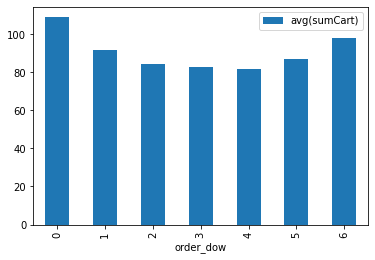

In [15]:
dataHistogram.toPandas().plot.bar(x="order_dow", y="avg(sumCart)")

### 3.2 MBA pour le training set (15 points)

En utilisant les commandes du ``order_products__train.csv``, cr√©ez un bloc de donn√©es o√π chaque ligne contient la colonne ``transaction`` avec la liste des produits achet√©s, de mani√®re similaire √† le toy dataset. Ensuite, ex√©cutez l'algorithme MBA pour cet ensemble de transactions.

- Vous devez signaler le temps pass√© pour effectuer cette t√¢che.
- La sortie doit contenir le nom des produits.

In [49]:
%%time
"""
TODO: create a query to create and sctruct the transactions
"""
orders_rdd =spark.sql(
    'SELECT op.order_id, COLLECT_LIST(p.product_name) AS transaction '
    'FROM order_prod op '
    'INNER JOIN products p ON op.product_id == p.product_id '
    'GROUP BY op.order_id'
).rdd

Wall time: 380 ms


In [50]:
%%time
"""
TODO: run the MBA algorithm and show the first 5 association rules
"""

patterns_rdd = orders_rdd.flatMap(map_to_patterns_from_list)

combined_patterns_rdd =patterns_rdd.reduceByKey(add)
subpatterns_rdd = combined_patterns_rdd.flatMap(map_to_subpatterns)
combined_rules = subpatterns_rdd.map(lambda row: (row.subpatterns, [ row.combined_rules ])).reduceByKey(add)
assoc_rules = combined_rules.flatMap(map_to_assoc_rules)

assoc_rules.map(format_tuples).toDF(['patterns', 'association_rules']).show(truncate=False)


Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.runJob.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 1 in stage 133.0 failed 1 times, most recent failure: Lost task 1.0 in stage 133.0 (TID 3219) (LAPTOP-7HBT1FLH.mshome.net executor driver): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "C:\Users\Julie\anaconda3\Lib\site-packages\pyspark\python\lib\pyspark.zip\pyspark\worker.py", line 604, in main
  File "C:\Users\Julie\anaconda3\Lib\site-packages\pyspark\python\lib\pyspark.zip\pyspark\worker.py", line 594, in process
  File "C:\Users\Julie\anaconda3\lib\site-packages\pyspark\rdd.py", line 2916, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "C:\Users\Julie\anaconda3\lib\site-packages\pyspark\rdd.py", line 2916, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "C:\Users\Julie\anaconda3\lib\site-packages\pyspark\rdd.py", line 418, in func
    return f(iterator)
  File "C:\Users\Julie\anaconda3\lib\site-packages\pyspark\rdd.py", line 2144, in combineLocally
    merger.mergeValues(iterator)
  File "C:\Users\Julie\anaconda3\Lib\site-packages\pyspark\python\lib\pyspark.zip\pyspark\shuffle.py", line 240, in mergeValues
    for k, v in iterator:
  File "<ipython-input-8-e58214a7d0bd>", line 9, in map_to_subpatterns
  File "C:\Users\Julie\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u2011' in position 54: character maps to <undefined>

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:517)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:652)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:635)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:470)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$GroupedIterator.fill(Iterator.scala:1209)
	at scala.collection.Iterator$GroupedIterator.hasNext(Iterator.scala:1215)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:132)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:99)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:52)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:497)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1439)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:500)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	at java.base/java.lang.Thread.run(Thread.java:834)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2258)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2207)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2206)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2206)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1079)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1079)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1079)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2445)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2387)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2376)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:868)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2196)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2217)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2236)
	at org.apache.spark.api.python.PythonRDD$.runJob(PythonRDD.scala:166)
	at org.apache.spark.api.python.PythonRDD.runJob(PythonRDD.scala)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.base/java.lang.Thread.run(Thread.java:834)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "C:\Users\Julie\anaconda3\Lib\site-packages\pyspark\python\lib\pyspark.zip\pyspark\worker.py", line 604, in main
  File "C:\Users\Julie\anaconda3\Lib\site-packages\pyspark\python\lib\pyspark.zip\pyspark\worker.py", line 594, in process
  File "C:\Users\Julie\anaconda3\lib\site-packages\pyspark\rdd.py", line 2916, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "C:\Users\Julie\anaconda3\lib\site-packages\pyspark\rdd.py", line 2916, in pipeline_func
    return func(split, prev_func(split, iterator))
  File "C:\Users\Julie\anaconda3\lib\site-packages\pyspark\rdd.py", line 418, in func
    return f(iterator)
  File "C:\Users\Julie\anaconda3\lib\site-packages\pyspark\rdd.py", line 2144, in combineLocally
    merger.mergeValues(iterator)
  File "C:\Users\Julie\anaconda3\Lib\site-packages\pyspark\python\lib\pyspark.zip\pyspark\shuffle.py", line 240, in mergeValues
    for k, v in iterator:
  File "<ipython-input-8-e58214a7d0bd>", line 9, in map_to_subpatterns
  File "C:\Users\Julie\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u2011' in position 54: character maps to <undefined>

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:517)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:652)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:635)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:470)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$GroupedIterator.fill(Iterator.scala:1209)
	at scala.collection.Iterator$GroupedIterator.hasNext(Iterator.scala:1215)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:132)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:99)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:52)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:497)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1439)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:500)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	... 1 more


# 3.3 MBA pour le dataset complet (15 points)

Comme vous l'avez probablement remarqu√©, m√™me pour un ensemble de donn√©es moins volumineux (le training dataset ne contient que 131 000 commandes), l'algorithme MBA est co√ªteux en calcul. Pour cette raison, cette fois, nous allons r√©p√©ter le processus, mais en utilisant maintenant Amazon Web Services (AWS) pour cr√©er un grand cluster. Toutes les instructions pour cr√©er un cluster avec spark et comment soumettre un travail seront expliqu√©es dans le laboratoire. Dans tous les cas, vous devez lire les instructions donn√©es dans le ``Instruction_AWS.pdf``.

Cette fois, nous travaillerons avec le fichier ``order_products__prior.csv``, qui contient plus de 3M commandes.

**PRODUCTION ATTENDUE**

Apr√®s avoir ex√©cut√© le MBA pour la plus grande collection de commandes, s√©lectionnez au hasard UN produit achet√© dans ``order_products__prior`` et affichez les r√®gles d'association (nom du produit et valeur d'association) de ce produit, c'est-√†-dire lorsque le produit est seul dans le panier. La sortie doit √™tre format√©e dans un tableau, o√π chaque ligne contenant les informations d'un produit associ√©. 

- Affichez l'ID et le nom du produit s√©lectionn√© au hasard.
- Signaler le temps d'ex√©cution.

In [51]:
%%time
"""
TODO: create a query to create and sctruct the transactions from the order_products__prior.csv file
"""
df_order_prod = spark.read.csv('instacart/order_products__train.csv', header=True, sep=',', inferSchema=True)
print('order_products__train.csv')
df_order_prod.show(5)

df_orders = spark.read.csv('instacart/orders.csv', header=True, sep=',', inferSchema=True)
print('orders.csv')
df_orders.show(5)

df_products = spark.read.csv('instacart/products.csv', header=True, sep=',', inferSchema=True)
print('products.csv')
df_products.show(5)


orders_rdd =spark.sql(
    'SELECT op.order_id, COLLECT_LIST(p.product_name) AS transaction '
    'FROM order_prod op '
    'INNER JOIN products p ON op.product_id == p.product_id '
    'GROUP BY op.order_id'
).rdd



order_products__train.csv
+--------+----------+-----------------+---------+
|order_id|product_id|add_to_cart_order|reordered|
+--------+----------+-----------------+---------+
|       1|     49302|                1|        1|
|       1|     11109|                2|        1|
|       1|     10246|                3|        0|
|       1|     49683|                4|        0|
|       1|     43633|                5|        1|
+--------+----------+-----------------+---------+
only showing top 5 rows

orders.csv
+--------+-------+--------+------------+---------+-----------------+----------------------+
|order_id|user_id|eval_set|order_number|order_dow|order_hour_of_day|days_since_prior_order|
+--------+-------+--------+------------+---------+-----------------+----------------------+
| 2539329|      1|   prior|           1|        2|                8|                  null|
| 2398795|      1|   prior|           2|        3|                7|                  15.0|
|  473747|      1|   prior| 

In [ ]:
%%time
"""
TODO: run the MBA algorithm and print the requested output
"""
combined_patterns_rdd =patterns_rdd.reduceByKey(add)
subpatterns_rdd = combined_patterns_rdd.flatMap(map_to_subpatterns)
combined_rules = subpatterns_rdd.map(lambda row: (row.subpatterns, [ row.combined_rules ])).reduceByKey(add)
assoc_rules = combined_rules.flatMap(map_to_assoc_rules)

assoc_rules.map(format_tuples).takeSample(False, 1, seed=0).toDF(['patterns', 'association_rules']).show()

# 3.4 Bonus - Empreinte carbone (1 point)

De nos jours, en apprentissage automatique, et en particulier pour le traitement du langage naturel (NLP), il est courant d'entra√Æner de grands r√©seaux de neurones sur des ensembles de donn√©es massifs. Par exemple, il faut 78 ans pour entra√Æner le mod√®le GPT-3, un r√©seau de neurones de pointe en NLP avec 175 milliards de param√®tres, en utilisant un seul GPU V100 \([Wolff Anthony et al, 2020](https://arxiv.org/pdf/2007.03051.pdf)\). L'√©mission de CO2 pour entra√Æner ce mod√®le √©quivaut √† conduire une voiture au Canada sur environ 550 000 km ! √âtant donn√© que ces environnements √† forte intensit√© √©nerg√©tique sont devenus populaires et se sont d√©velopp√©s ces derni√®res ann√©es, l'apprentissage automatique (ML) pourrait commencer √† devenir un acteur important du changement climatique.
 
Il est maintenant temps de mesurer les √©missions de carbone g√©n√©r√©es dans ce TP sur la base de [Strubell et al 2019](https://arxiv.org/pdf/1906.02243.pdf). Nous supposons que les machines sont situ√©es aux √âtats-Unis et que les deux processeurs (2,3 GHz Intel Xeon¬Æ E5-2686 v4) et la DRAM (8 GB) consomment en moyenne 243 watts par heure.


**Vous devez ex√©cuter la cellule ci-dessous avec le nombre d'heures pass√©es dans AWS pour recevoir le point.**


In [ ]:
from IPython.core.display import display, HTML

def compute_co2_emission(x):
    """
    x = number of hours
    """
    kwh = (243.0 * x)/1000
    #
    co2lbs = 0.954 * (1.58 * kwh)
    
    display(HTML(f"""
        <h4>In this TP, you generated {co2lbs} CO2e (lbs) which is equivalent to:  </h4>
        </br>
        <div>
            <ul>
              <li> {round(co2lbs/6.61,2)} servings of beef üêÑ (4 oz. meat per serving)</li>
              <li> {round(co2lbs * 0.337307,2)} km  of driving a car üöó in Canada</li>
            </ul> 
        </div>
    """))

    
hours = #TODO: Insert the number of hours spent in AWS
compute_co2_emission(hours)